# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [40]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


## 1. Is the distribution of body temperatures normal?

In [41]:
#define ECDF function the way DataCamp does
def ecdf(data): #Compute ECDF for a one-dimensional array of measurements.
    
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data) 
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

In [42]:
#generate random normal samples of temperature with mean from df and standard deviation from df
samples = np.random.normal(np.mean(df['temperature']),np.std(df['temperature']),10000)

In [43]:
x_theor, y_theor = ecdf(samples) #theoritical line 
x_data, y_data = ecdf(df['temperature']) #actual data

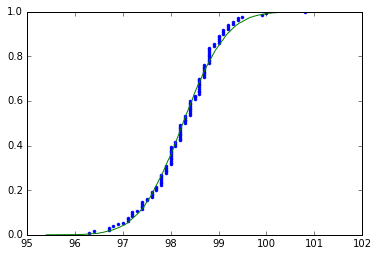

In [44]:
#plot theoritical ecdf vs actual ecdf from the data
plt.plot(x_data,y_data,marker='.',linestyle='none')
plt.plot(x_theor,y_theor)
plt.show()


#### Ans: 
Yes, the body temperatures are distributed normally. We are able to make this conclusion because the ecdf of the data does seem to nicely follow the theoritical ecdf. We can also safely assume that the population is normally distributed if this sample we have is the representation of the overall population.

## 2. Is the sample size large? Are the observations independent?

In [45]:
len(df)

130

#### Ans:  
The sample size of our dataset is 130. It's considered large enough for CLT to hold.

## 3. Is the true population mean really 98.6 degrees F?

Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t or  z statistic?
Now try using the other test. How is the result be different? Why? At what temperature should we consider someone's temperature to be "abnormal"?


In [46]:
#t-test
from scipy import stats
stats.ttest_1samp(df['temperature'], 98.6)
#Since p-value <0.05 , we reject the null hypothesis in favor of the alternative.

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [47]:
#TRY z-test
import statsmodels.stats.weightstats as sm
sm.ztest(df.temperature, value= 98.6, ddof=1)
# Since 0 is in inside the confidence interval, we reject the Null hypothesis in favor of the alternative. This result
 # is the same as the conclusion made when we did T-test

(-5.4548232923645195, 4.9021570141012155e-08)

### ANS:
We should two sample hypothesis test because of the way we set up our null and alternative hypothesis 

H0 : the population mean = 98.6

H1 : the population mean != 98.6

We should use T test instead of Z test because we only have the sample ( in other words, we do not know the population std) 

#### Since the p-value is less than 0.05, we reject the null in favor if the alternative. 

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [48]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
Standard_error = std/np.sqrt(len(df['temperature'])) #standard error
Margin_Error = 1.96 * Standard_error #margin of error
CI = (mean-me,mean+me)

print('Margin of Error:',Margin_Error)
print('95% Confidence Interval:',CI)

Margin of Error: 0.125550964803
95% Confidence Interval: (98.123679804428193, 98.374781734033363)


### ANS: 

We should consider someone's temperature to be "abnormal" if it falls outside the CI of (98.123679804428193, 98.374781734033363). Namely, if it's less than 98.12 degress or if it's greater than 98.37 deg

## 5. Is there a significant difference between males and females in normal temperature?


In [49]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']
stats.ttest_ind(male['temperature'], female['temperature'], equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

### ANS: 

We should use two sample t-test


H0: Population Mean Male body temp = Population Mean Female body temp

H1: Population Mean Male body temp != Population Mean Female body temp


#### Since the P-value=0.024 is less than alpha of 0.05, we reject the null hypothesis in favor of the alternative.